## What other analysis would you do on this dataset?
Come up with at least 2 analysis and find their results

You will get Bonus points if you can come up with more than 2 unique analysis

## Profit Analysis Based on Budget

### This will give us an idea of how profit varies across different budget categories.

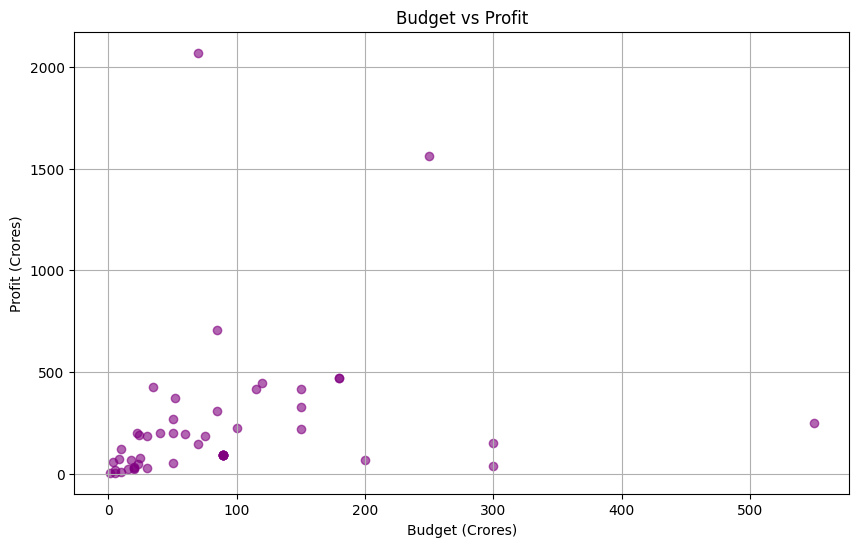

/tmp/ipykernel_238805/450389536.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_by_budget = combined.groupby('Budget Category')['Profit'].mean()


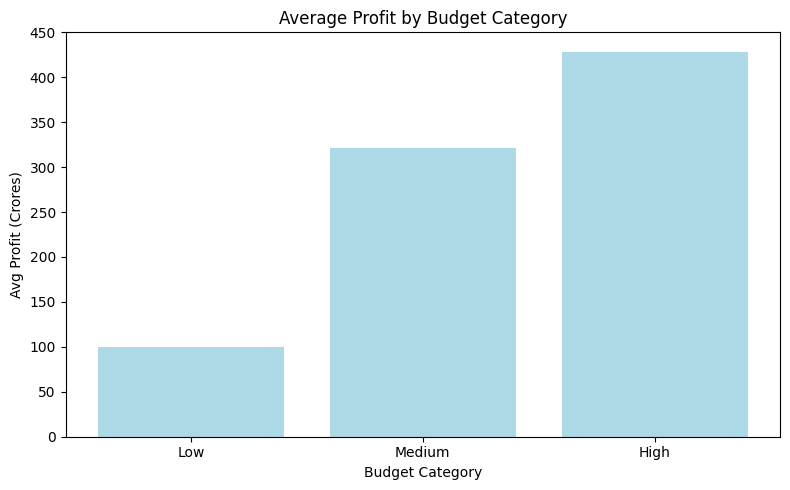

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

indian_movies = pd.read_csv('indian_movies_cleaned.csv')
bollywood = pd.read_csv('bollywood_movies_cleaned.csv')
tollywood = pd.read_csv('tollywood_movies_cleaned.csv')

combined = pd.concat([indian_movies, bollywood, tollywood], ignore_index=True)
combined.columns = combined.columns.str.strip()
combined['BoxOffice (Crores)'] = pd.to_numeric(combined['BoxOffice (Crores)'], errors='coerce')

combined.drop_duplicates(subset='Title', inplace=True)

combined['Profit'] = combined['BoxOffice (Crores)'] - combined['Budget (Crores)']

plt.figure(figsize=(10, 6))
plt.scatter(combined['Budget (Crores)'], combined['Profit'], color='purple', alpha=0.6)
plt.title('Budget vs Profit')
plt.xlabel('Budget (Crores)')
plt.ylabel('Profit (Crores)')
plt.grid(True)
plt.savefig('Q4. Profit Analysis.png')
plt.show()

bins = [0, 50, 150, float('inf')]  # Low, Medium, High Budget
labels = ['Low', 'Medium', 'High']
combined['Budget Category'] = pd.cut(combined['Budget (Crores)'], bins=bins, labels=labels)

avg_profit_by_budget = combined.groupby('Budget Category')['Profit'].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_profit_by_budget.index, avg_profit_by_budget.values, color='lightblue')
plt.title('Average Profit by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Avg Profit (Crores)')
plt.tight_layout()
plt.savefig('Q4. Average budget by category.png')
plt.show();


## ROI by Language

### This analysis will help to identify which language groups offer the highest returns on investment.

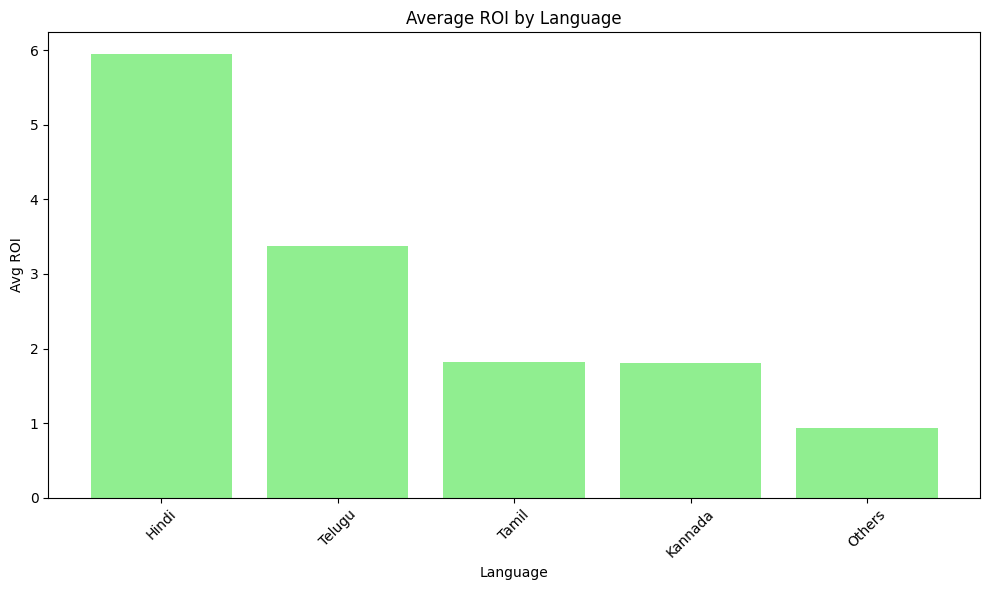

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

indian_movies = pd.read_csv('indian_movies_cleaned.csv')
bollywood = pd.read_csv('bollywood_movies_cleaned.csv')
tollywood = pd.read_csv('tollywood_movies_cleaned.csv')

combined = pd.concat([indian_movies, bollywood, tollywood], ignore_index=True)
combined.columns = combined.columns.str.strip()
combined['BoxOffice (Crores)'] = pd.to_numeric(combined['BoxOffice (Crores)'], errors='coerce')

combined.drop_duplicates(subset='Title', inplace=True)

combined['Profit'] = combined['BoxOffice (Crores)'] - combined['Budget (Crores)']
combined['ROI'] = combined['Profit'] / combined['Budget (Crores)']

languages_of_interest = ['Hindi', 'Telugu', 'Tamil', 'Kannada']
combined['Language'] = combined['Language'].apply(lambda x: x if x in languages_of_interest else 'Others')

avg_roi_by_language = combined.groupby('Language')['ROI'].mean().reindex(languages_of_interest + ['Others'])

# Bar plot for Average ROI by Language using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(avg_roi_by_language.index, avg_roi_by_language.values, color='lightgreen')
plt.title('Average ROI by Language')
plt.xlabel('Language')
plt.ylabel('Avg ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Q4. Average ROI by Language.png')
plt.show()
